In [1]:
# RunBatchRat-MeanEntrancetime
# Batch: run code on multiple cluster/session/animal

#modules to find path of all sessions
import glob
import os
import platform
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output, display, HTML



import warnings
warnings.filterwarnings("ignore")

if platform.system()=='Linux':
    root="/data"
    
elif platform.system()=="Windows":
    root="C:\\data\\"
    
else:
    root="/Users/davidrobbe/Documents/Data/"
    
    
def read_entranceTime(fullPath):
        maxTrialDuration=read_in_file(fullPath,"maximum trial duration",extension=".behav_param",valueType=float)
        entranceTimeStr=list(read_in_file(fullPath,"time",extension=".entrancetimes",valueType=str))
        return entranceTimeStr

    #-----------------------------------------------------------------------------------------------   
def read_in_file(fullPath,paramName,extension=".behav_param",exclude=None,valueType=str):
        '''
        Use to read from .behav_param or .entrancetimes
        Look for lines containing "paramName" and not containing "exclude"
        Split them by white spaces 
        example: "treadmill speed:     30.00" becomes ["treadmill","speed:","30.00"])
        Return a list of their last element, in the specified valueType (in example: "30.00")
        '''
        behav=fullPath+extension
        if not os.path.exists(behav):
            #print("No file %s"%behav)
            return []
        result=[]
        with open(behav,"r") as f:
            for line in f:
                if paramName in line:
                    if (exclude is not None) and (exclude in line):
                        continue
                    res=line.split()[-1]
                    #integer or float: replace comma by dots
                    if valueType in [int,float]:
                        res=res.replace(",",".")                 
                    #integer: convert first to float ("0.00" -> 0.00 -> 0)
                    if valueType is int:
                        res=int(float(res))
                    #boolean "TRUE" "FALSE"
                    elif valueType is bool:
                        res=(res.lower()=="true")
                    else:
                        res=valueType(res)
                    result.append(res)
        result=np.asarray(result)
        return result    

    
print("path to data is %s"%root)
print("")
print("importing done")    

#

path to data is /data

importing done


## Get animalList from text files

In [55]:
if "__file__" not in dir():
    pathListsLocation=os.path.join(root,'ALLRAT_Analysis')
    pathListsLocation
    ListOfList= [os.path.basename(path) for path in 
                 sorted(glob.glob(os.path.join(pathListsLocation,"Im*")))]


    animalList=[]
    for thisList in ListOfList:
        FileName=os.path.join(pathListsLocation,thisList)
        with open(FileName) as f:
            content = f.readlines()
            content = [x.strip() for x in content]
            for animal in content:
                if len(animal)>0:
                    animalList.append(animal)

    print(animalList)

['Rat121', 'Rat122', 'Rat123', 'Rat124']


In [57]:
#animalList.append('Rat106')
print(animalList)

['Rat121', 'Rat122', 'Rat123', 'Rat124', 'Rat106']


## return the last 10 median entrance time per animal

**********
Animal Rat121  sesssion Rat121_2017_05_02_17_09
4.114
max entrance time:  8.144


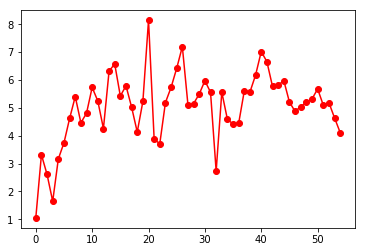

**********
Animal Rat122  sesssion Rat122_2017_05_02_17_10
5.282
max entrance time:  6.144


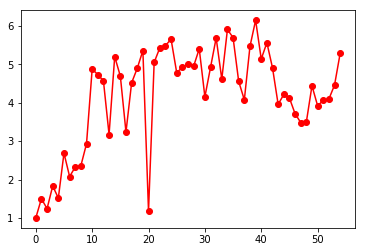

**********
Animal Rat123  sesssion Rat123_2017_05_02_17_09
5.42
max entrance time:  10.248


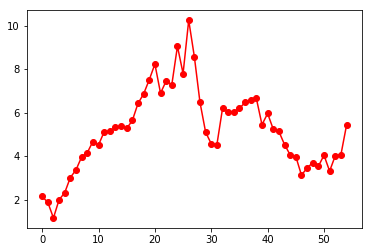

**********
Animal Rat124  sesssion Rat124_2017_05_02_17_09
5.55
max entrance time:  8.036


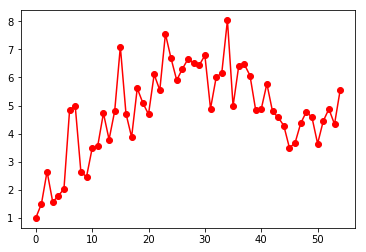

**********
Animal Rat106  sesssion Rat106_2017_05_03_14_38
7.08
max entrance time:  7.716


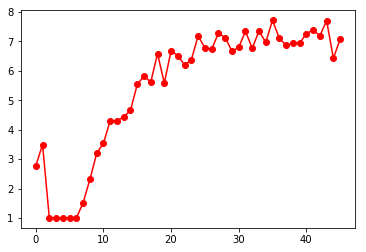

In [58]:
#animalList.append("Rat106")
for animal in animalList:
    #Get the list of all session
    sessionList=[os.path.basename(expPath) for expPath in glob.glob(os.path.join(root,animal,"Experiments","Rat*"))]
    sessionList=sorted(sessionList)
    LastSessionNames=sessionList[:]
    meanSessionEntranceTime=[]
    print("**********")
    for i,LastSessionName in enumerate(LastSessionNames):
        
        fullPath=os.path.join(root,animal,"Experiments",LastSessionName,LastSessionName)

        listeEntrance=read_entranceTime(fullPath)
        if len(listeEntrance)==0:
            continue
        
        for i in range(len(listeEntrance)):
            if listeEntrance[i]=="timeout":
                listeEntrance[i]=np.nan
            else:
                listeEntrance[i]=float(listeEntrance[i])
        meanSessionEntranceTime.append(np.nanmedian(listeEntrance))
    print("Animal %s"%animal," sesssion",LastSessionName)
    print(meanSessionEntranceTime[-1])
    print("max entrance time: ",np.max(meanSessionEntranceTime))
    plt.plot(meanSessionEntranceTime,'ro-'),plt.show()

# Rsync from NAS02

In [59]:
if "__file__" not in dir():
    #animalList=["Rat096"]
    PathToSourceDataFolder="/NAS02/"
    PathToDestinationDataFolder=root
    RsyncArgument="rsync -auvrR "
    IncludeArgument="--include '*/' --include '*/*.position' --include '*/*.entrancetimes' --include '*/*.lickbreaktime' --include '*/*.behav_param' --exclude '*/*.coder' --exclude '*/*.seq' "  
    CWD=os.getcwd()
    os.chdir(PathToSourceDataFolder)
    for animal in sorted(animalList):
        print("in progress: " + RsyncArgument +  IncludeArgument + animal + " " + PathToDestinationDataFolder)
        os.system(RsyncArgument +  IncludeArgument + animal + " " + PathToDestinationDataFolder)
        #sys.stdout.flush()
    clear_output()
    os.chdir(CWD)
    print("Done:",animalList)

Done: ['Rat121', 'Rat122', 'Rat123', 'Rat124', 'Rat106']
